# How to split strings in a pandas series

In [1]:
import pandas as pd

Read in fake data that I made up to practice with

In [9]:
df = pd.read_csv('fav_foods.csv')

A simple dataframe with id, email, and favorite foods. <br/>
Conveniently the email is made up of first_name.last_name@email.com <br/>
The dataframe also includes a column with a list of favorite foods seperated by commas

In [10]:
df.head(15)

,id,email,favorite_foods
0,1,liberty.hayes@email.com,"apple pie, hot dog, macaroni and cheese"
1,2,mallory.spears@email.com,"sushi, fried chicken, pizza"
2,3,easton.lara@email.com,"enchiladas, apple pie, hamburger"
3,4,jaslyn.mathews@email.com,"steak, hamburger, hot dog"
4,5,juliet.erickson@email.com,"poutine, sandwich"
5,6,laylah.sullivan@email.com,"french fries, ramen, fish and chips"
6,7,kenzie.underwood@email.com,"sushi, curly fries, chilps"
7,8,alexandra.raig@email.com,NaN
8,9,solomon.rollins@email.com,"hot dog, poutine"
9,10,alisha.mcgrath@email.com,"ramen, spaghetti"


# split
We can seperate the first name and last name by using the str.split method <br/>
This returns a list with the first name, the last name with the @email attached to it, and com \[first_name, last_name@email, com\]<br/>
Notice that the character that we split on (i.e., '.') is not included in the list

In [11]:
df['email'].str.split('.')

0        [liberty, hayes@email, com]
1       [mallory, spears@email, com]
2          [easton, lara@email, com]
3       [jaslyn, mathews@email, com]
4      [juliet, erickson@email, com]
5      [laylah, sullivan@email, com]
6     [kenzie, underwood@email, com]
7       [alexandra, raig@email, com]
8      [solomon, rollins@email, com]
9       [alisha, mcgrath@email, com]
10      [jakayla, suarez@email, com]
11       [alvaro, mccann@email, com]
12     [derrick, jackson@email, com]
13           [gina, ball@email, com]
14       [myles, hendrix@email, com]
Name: email, dtype: object

# n
To make our lives easier we only want to split on the first '.' <br/>
We can specify how many splits we want by including the n= paramater <br/>
n specifies the maximum number of splits that will occur <br/>
Now we just have two elements in our list, first name and last name (with some junk attached) \[first_name, last_name@...\]

In [13]:
df['email'].str.split('.',n=1)

0        [liberty, hayes@email.com]
1       [mallory, spears@email.com]
2          [easton, lara@email.com]
3       [jaslyn, mathews@email.com]
4      [juliet, erickson@email.com]
5      [laylah, sullivan@email.com]
6     [kenzie, underwood@email.com]
7       [alexandra, raig@email.com]
8      [solomon, rollins@email.com]
9       [alisha, mcgrath@email.com]
10      [jakayla, suarez@email.com]
11       [alvaro, mccann@email.com]
12     [derrick, jackson@email.com]
13           [gina, ball@email.com]
14       [myles, hendrix@email.com]
Name: email, dtype: object

# expand
This above code returns a Series of lists. I generally find it more helpful if each element is in it's own Series rather than in a list. We can accomplish this by using the expand=True parameter. <br/>
This will create a dataframe with each element in it's own column. We will assing the returned dataframe into split_email

In [60]:
split_email = df['email'].str.split('.',n=1, expand=True)
split_email

,0,1
0,liberty,hayes@email.com
1,mallory,spears@email.com
2,easton,lara@email.com
3,jaslyn,mathews@email.com
4,juliet,erickson@email.com
5,laylah,sullivan@email.com
6,kenzie,underwood@email.com
7,alexandra,raig@email.com
8,solomon,rollins@email.com
9,alisha,mcgrath@email.com


# rename
Nice! This is helpful, but the column names are not helpful. We can rename them using the .rename method. 

In [83]:
split_email.rename(columns={0:"first_name",1:"last_.com"})
split_email

,first_name,last_.com
0,liberty,hayes@email.com
1,mallory,spears@email.com
2,easton,lara@email.com
3,jaslyn,mathews@email.com
4,juliet,erickson@email.com
5,laylah,sullivan@email.com
6,kenzie,underwood@email.com
7,alexandra,raig@email.com
8,solomon,rollins@email.com
9,alisha,mcgrath@email.com


We can do that all in one step if you don't like :)

In [64]:
split_email2 = df['email'].str.split('.', n=1, expand=True).rename(columns={0:"first_name", 1:"last_.com"})
split_email2

,first_name,last_.com
0,liberty,hayes@email.com
1,mallory,spears@email.com
2,easton,lara@email.com
3,jaslyn,mathews@email.com
4,juliet,erickson@email.com
5,laylah,sullivan@email.com
6,kenzie,underwood@email.com
7,alexandra,raig@email.com
8,solomon,rollins@email.com
9,alisha,mcgrath@email.com


# split with new columns in original dataframe
Most often when I use the .split method I want to include it in the original dataframe. We can accomplish this with the code below. <br/>
The column names on the left side of the = are the new column names (if you had two splits you should provide would have 3 column names)

In [75]:
df[['first_name','last_name']] = df['email'].str.split('.', n=1, expand=True)
df

,id,email,favorite_foods,first_name,Last_name,last_name
0,1,liberty.hayes@email.com,"apple pie, hot dog, macaroni and cheese",liberty,hayes@email.com,hayes@email.com
1,2,mallory.spears@email.com,"sushi, fried chicken, pizza",mallory,spears@email.com,spears@email.com
2,3,easton.lara@email.com,"enchiladas, apple pie, hamburger",easton,lara@email.com,lara@email.com
3,4,jaslyn.mathews@email.com,"steak, hamburger, hot dog",jaslyn,mathews@email.com,mathews@email.com
4,5,juliet.erickson@email.com,"poutine, sandwich",juliet,erickson@email.com,erickson@email.com
5,6,laylah.sullivan@email.com,"french fries, ramen, fish and chips",laylah,sullivan@email.com,sullivan@email.com
6,7,kenzie.underwood@email.com,"sushi, curly fries, chilps",kenzie,underwood@email.com,underwood@email.com
7,8,alexandra.raig@email.com,NaN,alexandra,raig@email.com,raig@email.com
8,9,solomon.rollins@email.com,"hot dog, poutine",solomon,rollins@email.com,rollins@email.com
9,10,alisha.mcgrath@email.com,"ramen, spaghetti",alisha,mcgrath@email.com,mcgrath@email.com


# replace
Now we just need to clean up the last_name column. We can simply remove the @email.com by using the .replace method. As arguments we include the thing we want to replace and what we want to replace it with. <br/>
Here we want to replace the @gmail.com with an empty string (which removes the @email.com)

In [81]:
df['last_name'] = df['last_name'].str.replace('@email.com','')
df.sample(5)

,id,email,favorite_foods,first_name,Last_name,last_name,fav1,fav2,fav3
9,10,alisha.mcgrath@email.com,"ramen, spaghetti",alisha,mcgrath@email.com,mcgrath,ramen,spaghetti,None
10,11,jakayla.suarez@email.com,"lasagna, sushi, hamburger",jakayla,suarez@email.com,suarez,lasagna,sushi,hamburger
14,15,myles.hendrix@email.com,"pizza, ramen, hamburger",myles,hendrix@email.com,hendrix,pizza,ramen,hamburger
6,7,kenzie.underwood@email.com,"sushi, curly fries, chilps",kenzie,underwood@email.com,underwood,sushi,curly fries,chilps
1,2,mallory.spears@email.com,"sushi, fried chicken, pizza",mallory,spears@email.com,spears,sushi,fried chicken,pizza


That's the basics of the .split method. <br/>
Through the rest of the notebook we will go over what happens with NaN and when there are different amounts of characters we split on throughout the Series. <br/>
We saw in the favorite_foods column that there was a NaN value and that some rows two favorite foods and others have three favorite foods. <br/>

# NaN and None
NOTICE: We are spliting on '. ' (period space) not just '.' if we split on only '.' it will return the favorite food with ' ' attached to the front of the string. You probably don't want this. <br/>
What happens with NaN? NaN just gets carried over into all the the new columns <br/>
What happens when there are fewer splits (i.e., 1 split instead of 2)? When there is nothing to include in an extra column  None is placed in that cell. 

In [78]:
df[['fav1','fav2','fav3']] = df['favorite_foods'].str.split(', ', expand=True)
df

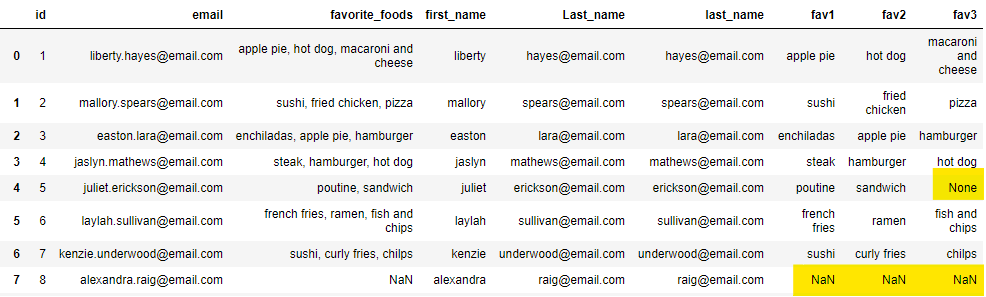